In [52]:
import act
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt, dates

## Importing Data:

In [53]:
username = 'hseppala'
#token = 

# Set the datastream and start/enddates
datastream = 'anxinterpolatedsondeM1.c1'
startdate = '2019-12-01'
enddate = '2020-03-31'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] anxinterpolatedsondeM1.c1.20200124.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200125.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200126.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200122.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200123.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200127.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200121.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200120.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200128.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200118.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200119.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200129.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200115.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200114.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200130.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200116.000030.nc
[DOWNLOADING] anxinterpolatedsondeM1.c1.20200204.000030.

We will make a dummy assumption that the sea surface temperature is 0$^o$C to start. This will allow us to quickly filter the days. May also download sea surface temperature data to make better calculations.

In [54]:
ds_sonde = act.io.read_arm_netcdf(result)
ds_sonde.clean.cleanup()
ds_sonde

<xarray.Dataset> Size: 9GB
Dimensions:            (time: 174240, height: 332)
Coordinates:
  * time               (time) datetime64[ns] 1MB 2019-12-01T00:00:30 ... 2020...
  * height             (height) float32 1kB 0.002 0.022 0.042 ... 39.5 40.0 40.5
Data variables: (12/39)
    base_time          (time) datetime64[ns] 1MB 2019-12-01 ... 2020-03-30
    time_offset        (time) datetime64[ns] 1MB 2019-12-01T00:00:30 ... 2020...
    precip             (time) float32 697kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_precip          (time) int32 697kB dask.array<chunksize=(1440,), meta=np.ndarray>
    temp               (time, height) float32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    qc_temp            (time, height) int32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    ...                 ...
    qc_rh_scaled       (time, height) int32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    aqc_rh_scaled      (time, height) int32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    vapor_source       (time, height) int32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    lat                (time) float32 697kB 69.14 69.14 69.14 ... 69.14 69.14
    lon                (time) float32 697kB 15.68 15.68 15.68 ... 15.68 15.68
    alt                (time) float32 697kB 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
Attributes: (12/17)
    command_line:          idl -R -n interpolatedsonde -s anx -f M1 -b 201912...
    Conventions:           ARM-1.1
    process_version:       vap-interpolatedsonde-7.0-1.el7
    input_datastreams:     anxgriddedsondeM1.c0 : 3.1 : 20191129.000030-20191...
    dod_version:           interpolatedsonde-c1-4.0
    site_id:               anx
    ...                    ...
    doi:                   10.5439/1095316
    history:               created by user giansiracusa on machine agate at 2...
    _file_dates:           ['20191201', '20191202', '20191203', '20191204', '...
    _file_times:           ['000030', '000030', '000030', '000030', '000030',...
    _datastream:           anxinterpolatedsondeM1.c1
    _arm_standards_flag:   1

## Analysis:
We need to find the potential temperature at 850hPa.

In [55]:
ds = ds_sonde[['potential_temp','bar_pres']]
ds

<xarray.Dataset> Size: 464MB
Dimensions:         (time: 174240, height: 332)
Coordinates:
  * time            (time) datetime64[ns] 1MB 2019-12-01T00:00:30 ... 2020-03...
  * height          (height) float32 1kB 0.002 0.022 0.042 ... 39.5 40.0 40.5
Data variables:
    potential_temp  (time, height) float32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    bar_pres        (time, height) float32 231MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
Attributes: (12/17)
    command_line:          idl -R -n interpolatedsonde -s anx -f M1 -b 201912...
    Conventions:           ARM-1.1
    process_version:       vap-interpolatedsonde-7.0-1.el7
    input_datastreams:     anxgriddedsondeM1.c0 : 3.1 : 20191129.000030-20191...
    dod_version:           interpolatedsonde-c1-4.0
    site_id:               anx
    ...                    ...
    doi:                   10.5439/1095316
    history:               created by user giansiracusa on machine agate at 2...
    _file_dates:           ['20191201', '20191202', '20191203', '20191204', '...
    _file_times:           ['000030', '000030', '000030', '000030', '000030',...
    _datastream:           anxinterpolatedsondeM1.c1
    _arm_standards_flag:   1

In [56]:
t = range(0,174240,120) #The 120 is a 2 hour step; can make finer
t_strong_ind = []
t_weak_ind = []
M = []
for i in t:
    if not np.isnan(ds['bar_pres'][i,:].values).all(): #checks if all nan
        h = np.nanargmin(np.abs(ds['bar_pres'][i,:].values-85))
        if ds['potential_temp'][i,h] < 270.15:
            t_strong_ind.append(i)
        elif ds['potential_temp'][i,h] < 272.15:
            t_weak_ind.append(i)
        M.append(ds['potential_temp'][i,h])

In [57]:
print(ds['time'][t_weak_ind].values)
print(ds['time'][t_strong_ind].values)

['2020-01-25T20:00:30.000000000' '2020-01-25T22:00:30.000000000'
 '2020-01-26T00:00:30.000000000' '2020-01-26T02:00:30.000000000'
 '2020-01-26T04:00:30.000000000' '2020-01-26T06:00:30.000000000'
 '2020-02-04T16:00:30.000000000' '2020-02-04T18:00:30.000000000'
 '2020-02-04T20:00:30.000000000' '2020-02-05T08:00:30.000000000'
 '2020-02-05T14:00:30.000000000' '2020-02-05T16:00:30.000000000'
 '2020-02-05T18:00:30.000000000' '2020-02-05T20:00:30.000000000'
 '2020-02-29T22:00:30.000000000' '2020-03-01T00:00:30.000000000'
 '2020-03-01T02:00:30.000000000' '2020-03-01T04:00:30.000000000'
 '2020-03-01T06:00:30.000000000' '2020-03-01T08:00:30.000000000'
 '2020-03-01T10:00:30.000000000' '2020-03-01T12:00:30.000000000'
 '2020-03-12T22:00:30.000000000' '2020-03-13T00:00:30.000000000'
 '2020-03-13T02:00:30.000000000' '2020-03-13T16:00:30.000000000'
 '2020-03-13T18:00:30.000000000' '2020-03-13T20:00:30.000000000'
 '2020-03-13T22:00:30.000000000' '2020-03-14T00:00:30.000000000'
 '2020-03-14T02:00:30.000

ValueError: x and y must have same first dimension, but have shapes (1452,) and (1445,)

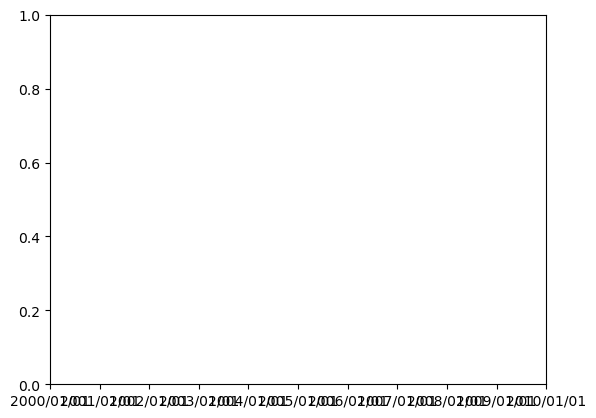

In [58]:
fig,ax = plt.subplots()
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y/%m/%d'))
ax.plot(ds['time'][t],M,'o-')
ax.set_title('COMBLE T at 850hPa')
ax.set_ylabel('Temperature (K)')
ax.set_xlabel('timestamp')
ax.set_xlim('2019-11-28T20:00:30.000000000','2020-04-02T16:00:30.000000000')
ax.tick_params(axis='x', labelrotation=40)
plt.hlines(270.15,xmin='2019-11-15T20:00:30.000000000',xmax='2020-05-01T16:00:30.000000000',color='tab:red')
plt.hlines(272.15,xmin='2019-11-15T20:00:30.000000000',xmax='2020-05-01T16:00:30.000000000',color='tab:orange')

# NSA Site:

In [35]:
datastream = 'nsainterpolatedsondeC1.c1'
startdate = '2020-08-01'
enddate = '2020-10-15'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] nsainterpolatedsondeC1.c1.20200902.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200903.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200922.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200920.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200921.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200801.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200804.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200803.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200802.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200805.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200806.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200807.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200808.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200809.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200810.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200811.000030.nc
[DOWNLOADING] nsainterpolatedsondeC1.c1.20200812.000030.

In [36]:
ds_nsa = act.io.read_arm_netcdf(result)
ds_nsa.clean.cleanup()
ds_nsa

<xarray.Dataset> Size: 5GB
Dimensions:            (time: 96480, height: 332)
Coordinates:
  * time               (time) datetime64[ns] 772kB 2020-08-01T00:00:30 ... 20...
  * height             (height) float32 1kB 0.008 0.028 0.048 ... 40.01 40.51
Data variables: (12/39)
    base_time          (time) datetime64[ns] 772kB 2020-08-01 ... 2020-10-06
    time_offset        (time) datetime64[ns] 772kB 2020-08-01T00:00:30 ... 20...
    precip             (time) float32 386kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_precip          (time) int32 386kB dask.array<chunksize=(1440,), meta=np.ndarray>
    temp               (time, height) float32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    qc_temp            (time, height) int32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    ...                 ...
    qc_rh_scaled       (time, height) int32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    aqc_rh_scaled      (time, height) int32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    vapor_source       (time, height) int32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    lat                (time) float32 386kB 71.32 71.32 71.32 ... 71.32 71.32
    lon                (time) float32 386kB -156.6 -156.6 ... -156.6 -156.6
    alt                (time) float32 386kB 8.0 8.0 8.0 8.0 ... 8.0 8.0 8.0 8.0
Attributes: (12/17)
    command_line:          idl -D 0 -R -n interpolatedsonde -s nsa -f C1 -b 2...
    Conventions:           ARM-1.1
    process_version:       vap-interpolatedsonde-6.6-0.el6
    input_datastreams:     nsagriddedsondeC1.c0 : 3.0 : 20200730.000030-20200...
    dod_version:           interpolatedsonde-c1-4.0
    site_id:               nsa
    ...                    ...
    doi:                   10.5439/1095316
    history:               created by user dsmgr on machine ruby at 2020-08-0...
    _file_dates:           ['20200801', '20200802', '20200803', '20200804', '...
    _file_times:           ['000030', '000030', '000030', '000030', '000030',...
    _datastream:           nsainterpolatedsondeC1.c1
    _arm_standards_flag:   1

In [37]:
ds = ds_nsa[['potential_temp','bar_pres']]
ds

<xarray.Dataset> Size: 257MB
Dimensions:         (time: 96480, height: 332)
Coordinates:
  * time            (time) datetime64[ns] 772kB 2020-08-01T00:00:30 ... 2020-...
  * height          (height) float32 1kB 0.008 0.028 0.048 ... 39.51 40.01 40.51
Data variables:
    potential_temp  (time, height) float32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
    bar_pres        (time, height) float32 128MB dask.array<chunksize=(1440, 332), meta=np.ndarray>
Attributes: (12/17)
    command_line:          idl -D 0 -R -n interpolatedsonde -s nsa -f C1 -b 2...
    Conventions:           ARM-1.1
    process_version:       vap-interpolatedsonde-6.6-0.el6
    input_datastreams:     nsagriddedsondeC1.c0 : 3.0 : 20200730.000030-20200...
    dod_version:           interpolatedsonde-c1-4.0
    site_id:               nsa
    ...                    ...
    doi:                   10.5439/1095316
    history:               created by user dsmgr on machine ruby at 2020-08-0...
    _file_dates:           ['20200801', '20200802', '20200803', '20200804', '...
    _file_times:           ['000030', '000030', '000030', '000030', '000030',...
    _datastream:           nsainterpolatedsondeC1.c1
    _arm_standards_flag:   1

In [38]:
t = range(0,96480,120) #The 120 is a 2 hour step; can make finer
t_strong_ind = []
t_weak_ind = []
M = []
for i in t:
    if not np.isnan(ds['bar_pres'][i,:].values).all(): #checks if all nan
        h = np.nanargmin(np.abs(ds['bar_pres'][i,:].values-85))
        if ds['potential_temp'][i,h] < 273.15:
            t_strong_ind.append(i)
        elif ds['potential_temp'][i,h] < 275.15:
            t_weak_ind.append(i)
        M.append(ds['potential_temp'][i,h])

In [39]:
print(ds['time'][t_weak_ind].values)
print(ds['time'][t_strong_ind].values)

['2020-09-23T04:00:30.000000000' '2020-09-23T06:00:30.000000000'
 '2020-09-23T14:00:30.000000000' '2020-09-23T16:00:30.000000000'
 '2020-09-23T18:00:30.000000000' '2020-09-23T20:00:30.000000000'
 '2020-10-06T10:00:30.000000000' '2020-10-06T12:00:30.000000000'
 '2020-10-06T14:00:30.000000000' '2020-10-06T16:00:30.000000000']
['2020-10-06T18:00:30.000000000']


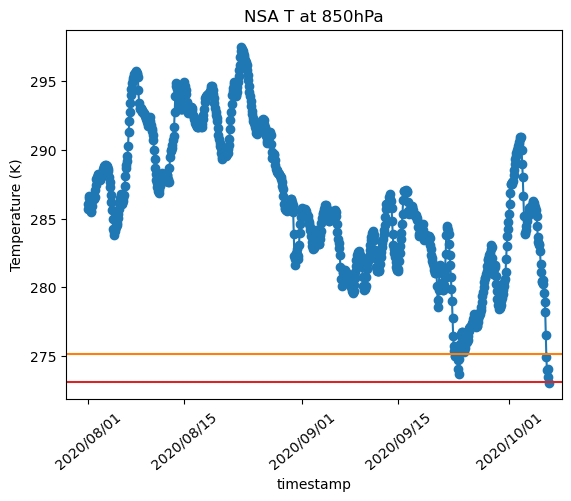

In [43]:
fig,ax = plt.subplots()
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y/%m/%d'))
ax.plot(ds['time'][t],M,'o-')
ax.set_title('NSA T at 850hPa')
ax.set_ylabel('Temperature (K)')
ax.set_xlabel('timestamp')
ax.set_xlim('2020-07-28T20:00:30.000000000','2020-10-08T16:00:30.000000000')
ax.tick_params(axis='x', labelrotation=40)
plt.hlines(273.15,xmin='2020-07-28T20:00:30.000000000',xmax='2020-10-17T16:00:30.000000000',color='tab:red')
plt.hlines(275.15,xmin='2020-07-28T20:00:30.000000000',xmax='2020-10-17T16:00:30.000000000',color='tab:orange')